In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
import seaborn as sns
from collections import OrderedDict
from scipy.stats.mstats import gmean
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.stats.multicomp import multipletests
#from bioinfokit.analys import get_data
import numpy as np
import pandas as pd
from statannotations.Annotator import Annotator
import time
import itertools

# Make the Plots pretty
import seaborn as sns
sns.set()


fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline




In [2]:
df=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/NPGO/Nutrients_2002-2015_SoG.xlsx',engine='openpyxl')

In [3]:
df

,File Name,Zone,FIL:START TIME YYYY/MM/DD HH:MM:SS,LOC:EVENT_NUMBER,LOC:LATITUDE,LOC:LONGITUDE,LOC:WATER DEPTH,ADM:SCIENTIST,ADM:MISSION,LOC:STATION,...,Oxygen:Dissolved [mL/L],Salinity:Bottle [PSS-78],Nitrate_plus_Nitrite [umol/L],Phosphate [umol/L],Silicate [umol/L],Chlorophyll:Extracted [mg/m^3],Comments by sample_numbeR,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2002-01-0001.che,UTC,2002-02-06 04:57:22,1,48.59233,-123.50100,,Robert M.,2002-01-01 00:00:00,SI03,...,5.120,29.1003,28.2,2.44,60.3,0.241,NaN,NaN,NaN,NaN
1,2002-01-0001.che,UTC,2002-02-06 04:57:22,1,48.59233,-123.50100,,Robert M.,2002-01-01 00:00:00,SI03,...,4.700,29.6092,28.8,2.54,59.9,0.129,NaN,NaN,NaN,NaN
2,2002-01-0001.che,UTC,2002-02-06 04:57:22,1,48.59233,-123.50100,,Robert M.,2002-01-01 00:00:00,SI03,...,4.667,29.8446,28.5,2.51,58.1,0.048,NaN,NaN,NaN,NaN
3,2002-01-0001.che,UTC,2002-02-06 04:57:22,1,48.59233,-123.50100,,Robert M.,2002-01-01 00:00:00,SI03,...,4.924,30.0574,28.3,2.48,56.3,-9.900,NaN,NaN,NaN,NaN
4,2002-01-0001.che,UTC,2002-02-06 04:57:22,1,48.59233,-123.50100,,Robert M.,2002-01-01 00:00:00,SI03,...,4.312,30.2687,28.0,2.66,59.6,-9.900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,2015-46-0142.che,UTC,2015-08-02 20:59:10,142,49.02100,-125.15617,120,Johannessen S.,2015-46,EF07,...,4.535,88.8000,88.8,88.80,88.8,88.800,OXY: Spigot was leaking from area where it co...,NaN,NaN,NaN
22427,2015-46-0142.che,UTC,2015-08-02 20:59:10,142,49.02100,-125.15617,120,Johannessen S.,2015-46,EF07,...,1.858,88.8000,88.8,88.80,88.8,88.800,NaN,NaN,NaN,NaN
22428,2015-46-0142.che,UTC,2015-08-02 20:59:10,142,49.02100,-125.15617,120,Johannessen S.,2015-46,EF07,...,1.517,88.8000,88.8,88.80,88.8,88.800,NaN,NaN,NaN,NaN
22429,2015-46-0142.che,UTC,2015-08-02 20:59:10,142,49.02100,-125.15617,120,Johannessen S.,2015-46,EF07,...,1.406,88.8000,88.8,88.80,88.8,88.800,NaN,NaN,NaN,NaN


In [4]:
df.keys()

Index(['File Name', 'Zone', 'FIL:START TIME YYYY/MM/DD HH:MM:SS',
       'LOC:EVENT_NUMBER', 'LOC:LATITUDE', 'LOC:LONGITUDE', 'LOC:WATER DEPTH',
       'ADM:SCIENTIST', 'ADM:MISSION', 'LOC:STATION', 'ADM:PROJECT',
       'ADM:AGENCY', 'ADM:PLATFORM', 'LOC:GEOGRAPHIC AREA',
       'FIL:DATA DESCRIPTION', 'Pressure [decibar]',
       'Temperature:Primary [deg C (ITS90)]', 'Transmissivity [*/metre]',
       'Bottle_Number', 'Salinity:T0:C0 [PSS-78]', 'Oxygen:Dissolved [mL/L]',
       'Salinity:Bottle [PSS-78]', 'Nitrate_plus_Nitrite [umol/L]',
       'Phosphate [umol/L]', 'Silicate [umol/L]',
       'Chlorophyll:Extracted [mg/m^3]', 'Comments by sample_numbeR',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [5]:
df.drop(labels=['File Name', 'Zone','LOC:EVENT_NUMBER','ADM:SCIENTIST', 'ADM:MISSION', 'ADM:PROJECT',
       'ADM:AGENCY', 'ADM:PLATFORM', 'FIL:DATA DESCRIPTION','Comments by sample_numbeR',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29','Bottle_Number','Salinity:T0:C0 [PSS-78]'],axis=1,inplace=True)

In [6]:
df.keys()

Index(['FIL:START TIME YYYY/MM/DD HH:MM:SS', 'LOC:LATITUDE', 'LOC:LONGITUDE',
       'LOC:WATER DEPTH', 'LOC:STATION', 'LOC:GEOGRAPHIC AREA',
       'Pressure [decibar]', 'Temperature:Primary [deg C (ITS90)]',
       'Transmissivity [*/metre]', 'Oxygen:Dissolved [mL/L]',
       'Salinity:Bottle [PSS-78]', 'Nitrate_plus_Nitrite [umol/L]',
       'Phosphate [umol/L]', 'Silicate [umol/L]',
       'Chlorophyll:Extracted [mg/m^3]'],
      dtype='object')

In [7]:
df.rename(columns={'FIL:START TIME YYYY/MM/DD HH:MM:SS':'dtUTC', 'LOC:LATITUDE':'Lat', 'LOC:LONGITUDE':'Lon',
       'LOC:WATER DEPTH':'Station_Depth', 'LOC:STATION':'Station', 'LOC:GEOGRAPHIC AREA':'Region',
       'Pressure [decibar]':'Pressure', 'Temperature:Primary [deg C (ITS90)]':'Temperature',
       'Transmissivity [*/metre]':'Transmissivity',
       'Oxygen:Dissolved [mL/L]':'DO', 'Salinity:Bottle [PSS-78]':'Salinity',
       'Nitrate_plus_Nitrite [umol/L]':'Nitrate', 'Phosphate [umol/L]':'Phosphate',
       'Silicate [umol/L]':'Silicate', 'Chlorophyll:Extracted [mg/m^3]':'Chla'},inplace=True)

In [8]:
df

,dtUTC,Lat,Lon,Station_Depth,Station,Region,Pressure,Temperature,Transmissivity,DO,Salinity,Nitrate,Phosphate,Silicate,Chla
0,2002-02-06 04:57:22,48.59233,-123.50100,,SI03,NE Pacific,1.2,8.3565,44.0,5.120,29.1003,28.2,2.44,60.3,0.241
1,2002-02-06 04:57:22,48.59233,-123.50100,,SI03,NE Pacific,10.5,8.5182,55.3,4.700,29.6092,28.8,2.54,59.9,0.129
2,2002-02-06 04:57:22,48.59233,-123.50100,,SI03,NE Pacific,25.2,8.6178,52.8,4.667,29.8446,28.5,2.51,58.1,0.048
3,2002-02-06 04:57:22,48.59233,-123.50100,,SI03,NE Pacific,50.3,8.3228,45.7,4.924,30.0574,28.3,2.48,56.3,-9.900
4,2002-02-06 04:57:22,48.59233,-123.50100,,SI03,NE Pacific,75.9,8.4053,41.3,4.312,30.2687,28.0,2.66,59.6,-9.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22426,2015-08-02 20:59:10,49.02100,-125.15617,120,EF07,WCVI/Strait of Georgia/Douglas Channel,30.3,11.0877,55.1,4.535,88.8000,88.8,88.80,88.8,88.800
22427,2015-08-02 20:59:10,49.02100,-125.15617,120,EF07,WCVI/Strait of Georgia/Douglas Channel,50.5,9.2428,56.4,1.858,88.8000,88.8,88.80,88.8,88.800
22428,2015-08-02 20:59:10,49.02100,-125.15617,120,EF07,WCVI/Strait of Georgia/Douglas Channel,75.0,8.6481,46.4,1.517,88.8000,88.8,88.80,88.8,88.800
22429,2015-08-02 20:59:10,49.02100,-125.15617,120,EF07,WCVI/Strait of Georgia/Douglas Channel,100.6,8.5739,48.0,1.406,88.8000,88.8,88.80,88.8,88.800


In [9]:
df.Region.unique()

array(['NE Pacific', 'Strait of Georgia/J.de Fuca Strait',
       'Broughton Archipelago', 'LineP/Series/Solas',
       'Broughton Archipelago/Georgia Strait Inl', 'SoG / JdeF',
       'WCVI/QCI', 'N.E. Pacific', 'Strait of George/Juan de Fuca',
       'BC Inlets', 'SoG/JdeF/Knight Inlet', 'WCVI/JdeF',
       'Strait of George / Jean de Fuca Strait', 'Gulf of Alaska',
       'West Coast Vancouver Island',
       'Strait of Georgia/Juan de Fuca Strait', 'B.C. Inlets',
       'N.E.Pacific', 'W.C.V.I./Georgia Strait', 'WCVI/Knight Inlet',
       'Strait of Georgia/Juan de Fuca',
       'Endeavour Ridge/Juan de Fuca Strait',
       'West Coast Van.Is./Queen Charlotte Sound',
       'West Coast Van.Is.\\Juan de Fuca\\Strait o',
       'WCVI/Strait of Georgia', 'WCVI / SoG / JdeF',
       'Juan de Fuca Strait/Strait of Georgia', 'WCVI / Cape Scott',
       'Juan de Fuca Strait /Strait of Georgia', 'WCVI / Juan de Fuca',
       'Queen Charlotte Sound', 'Juan de Fuca Strait / Strait of Georgia

In [10]:
SoG=df.loc[(df.Region=='Strait of Georgia')|(df.Region=='Strait of Georgia /Juan de Fuca')|(df.Region=='Strait of Georgia/J.de Fuca Strait')|(df.Region=='SoG / JdeF')|\
          (df.Region=='Strait of George/Juan de Fuca')|(df.Region=='Strait of George / Jean de Fuca Strait')|(df.Region=='Strait of Georgia/Juan de Fuca Strait')|\
          (df.Region=='Strait of Georgia /Juan de Fuca Strait')| (df.Region=='JdeF/SoG')|(df.Region=='Strait of Georgia & Juan de Fuca Strait')|(df.Region=='Strait of Georgia / Juan de Fuca')|\
       (df.Region=='Juan de Fuca Strait, Strait of Georgia')]


In [11]:
SoG

,dtUTC,Lat,Lon,Station_Depth,Station,Region,Pressure,Temperature,Transmissivity,DO,Salinity,Nitrate,Phosphate,Silicate,Chla
12,2002-01-09 19:32:21,48.65283,-123.50716,,SI,Strait of Georgia/J.de Fuca Strait,1.3,8.5107,13.9,7.436,7.9883,12.00,1.400,66.20,88.8
13,2002-01-09 19:32:21,48.65283,-123.50716,,SI,Strait of Georgia/J.de Fuca Strait,10.7,8.4518,50.5,5.067,29.5831,28.00,2.530,54.50,88.8
14,2002-01-09 19:32:21,48.65283,-123.50716,,SI,Strait of Georgia/J.de Fuca Strait,20.3,8.4582,49.7,4.830,29.6707,27.50,2.400,54.80,88.8
15,2002-01-09 19:32:21,48.65283,-123.50716,,SI,Strait of Georgia/J.de Fuca Strait,30.7,8.6323,49.6,4.766,29.7939,28.40,2.530,55.10,88.8
16,2002-01-09 19:32:21,48.65283,-123.50716,,SI,Strait of Georgia/J.de Fuca Strait,39.7,8.7602,50.0,4.712,29.8750,28.00,2.540,54.30,88.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21024,2014-10-30 06:19:17,49.31833,-123.80000,341,27,Strait of Georgia/Juan de Fuca Strait,176.2,9.5823,54.2,2.955,-99.0000,28.80,2.502,55.22,-99.0
21025,2014-10-30 06:19:17,49.31833,-123.80000,341,27,Strait of Georgia/Juan de Fuca Strait,201.4,9.3427,59.2,2.987,-99.0000,29.33,2.534,57.71,-99.0
21026,2014-10-30 06:19:17,49.31833,-123.80000,341,27,Strait of Georgia/Juan de Fuca Strait,250.8,9.3011,57.1,2.923,-99.0000,29.44,2.576,59.14,-99.0
21027,2014-10-30 06:19:17,49.31833,-123.80000,341,27,Strait of Georgia/Juan de Fuca Strait,301.3,9.2695,59.7,2.933,31.1977,29.52,2.566,59.39,-99.0


In [12]:
data_SoG=SoG.loc[(SoG.dtUTC>=dt.datetime(2007,1,1))&(SoG.dtUTC<=dt.datetime(2015,12,31)),:]

In [13]:
data_SoG['Year']=[ii.year for ii in data_SoG['dtUTC']]
data_SoG['Month']=[ii.month for ii in data_SoG['dtUTC']]
data_SoG['YD']=et.datetimeToYD(data_SoG['dtUTC'])

<ipython-input-13-f725980fa502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SoG['Year']=[ii.year for ii in data_SoG['dtUTC']]
<ipython-input-13-f725980fa502>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_SoG['Month']=[ii.month for ii in data_SoG['dtUTC']]
<ipython-input-13-f725980fa502>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [14]:
data_SoG

,dtUTC,Lat,Lon,Station_Depth,Station,Region,Pressure,Temperature,Transmissivity,DO,Salinity,Nitrate,Phosphate,Silicate,Chla,Year,Month,YD
8394,2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,2.7,88.8000,5.9,9.337,-99.0000,4.70,0.900,40.50,26.54,2007,4,92
8395,2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,6.2,88.8000,4.1,8.010,-99.0000,13.40,1.440,40.20,25.93,2007,4,92
8396,2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,10.8,88.8000,34.3,5.983,-99.0000,23.60,2.090,47.40,11.11,2007,4,92
8397,2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,21.2,88.8000,43.5,5.612,29.3326,25.20,2.150,50.10,1.24,2007,4,92
8398,2007-04-02 21:40:07,48.63000,-123.2425,,59,Strait of Georgia & Juan de Fuca Strait,2.5,88.8000,35.5,5.922,88.8000,22.70,1.950,43.20,1.17,2007,4,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21024,2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,176.2,9.5823,54.2,2.955,-99.0000,28.80,2.502,55.22,-99.00,2014,10,303
21025,2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,201.4,9.3427,59.2,2.987,-99.0000,29.33,2.534,57.71,-99.00,2014,10,303
21026,2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,250.8,9.3011,57.1,2.923,-99.0000,29.44,2.576,59.14,-99.00,2014,10,303
21027,2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,301.3,9.2695,59.7,2.933,31.1977,29.52,2.566,59.39,-99.00,2014,10,303


In [15]:
View2007=data_SoG.loc[data_SoG.Year==2007]
View2009=data_SoG.loc[data_SoG.Year==2009]
View2011=data_SoG.loc[data_SoG.Year==2011]
View2014=data_SoG.loc[data_SoG.Year==2014]

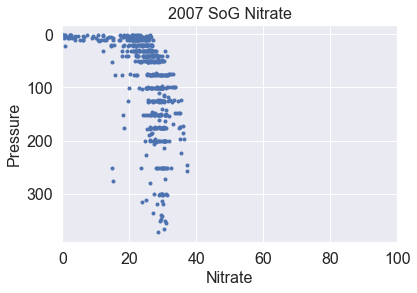

In [16]:


# Profile Plot
plt.plot(View2007.Nitrate,View2007.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,100)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('2007 SoG Nitrate');


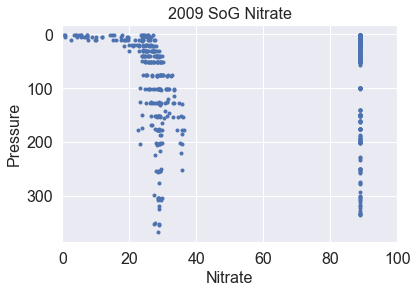

In [17]:


# Profile Plot
plt.plot(View2009.Nitrate,View2009.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,100)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('2009 SoG Nitrate');

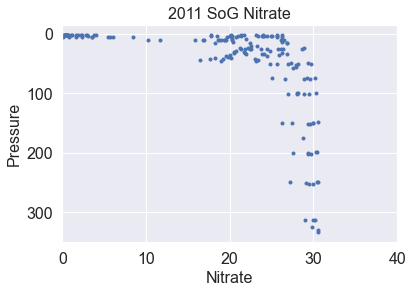

In [18]:


# Profile Plot
plt.plot(View2011.Nitrate,View2011.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('2011 SoG Nitrate');



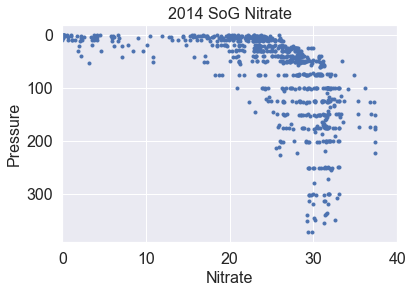

In [19]:
# Profile Plot
plt.plot(View2014.Nitrate,View2014.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('2014 SoG Nitrate');

In [20]:
Spring2007=View2007.loc[(View2007.Month==3)|(View2007.Month==4)|(View2007.Month==5)]
Spring2014=View2014.loc[(View2014.Month==3)|(View2014.Month==4)|(View2014.Month==5)]

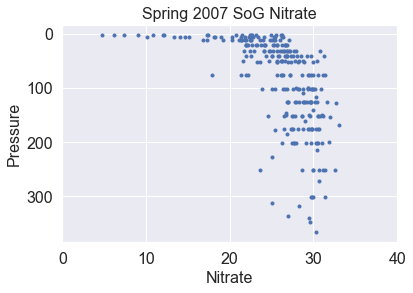

In [21]:

# Profile Plot
plt.plot(Spring2007.Nitrate,Spring2007.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('Spring 2007 SoG Nitrate');

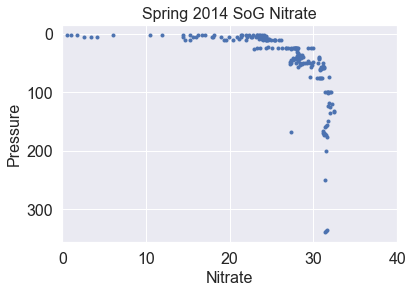

In [22]:

# Profile Plot
plt.plot(Spring2014.Nitrate,Spring2014.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('Spring 2014 SoG Nitrate');

In [23]:
data_SoG.set_index('dtUTC',inplace=True)

In [24]:
data_SoG = data_SoG.dropna(how = 'all')

In [25]:
data_SoG

,Lat,Lon,Station_Depth,Station,Region,Pressure,Temperature,Transmissivity,DO,Salinity,Nitrate,Phosphate,Silicate,Chla,Year,Month,YD
dtUTC,,,,,,,,,,,,,,,,,
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,2.7,88.8000,5.9,9.337,-99.0000,4.70,0.900,40.50,26.54,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,6.2,88.8000,4.1,8.010,-99.0000,13.40,1.440,40.20,25.93,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,10.8,88.8000,34.3,5.983,-99.0000,23.60,2.090,47.40,11.11,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,21.2,88.8000,43.5,5.612,29.3326,25.20,2.150,50.10,1.24,2007,4,92
2007-04-02 21:40:07,48.63000,-123.2425,,59,Strait of Georgia & Juan de Fuca Strait,2.5,88.8000,35.5,5.922,88.8000,22.70,1.950,43.20,1.17,2007,4,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,176.2,9.5823,54.2,2.955,-99.0000,28.80,2.502,55.22,-99.00,2014,10,303
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,201.4,9.3427,59.2,2.987,-99.0000,29.33,2.534,57.71,-99.00,2014,10,303
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,250.8,9.3011,57.1,2.923,-99.0000,29.44,2.576,59.14,-99.00,2014,10,303


In [26]:
data_SoG = data_SoG.loc[(data_SoG['Nitrate'] >0)&(data_SoG['Nitrate'] < 88)]

In [27]:
data_SoG

,Lat,Lon,Station_Depth,Station,Region,Pressure,Temperature,Transmissivity,DO,Salinity,Nitrate,Phosphate,Silicate,Chla,Year,Month,YD
dtUTC,,,,,,,,,,,,,,,,,
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,2.7,88.8000,5.9,9.337,-99.0000,4.70,0.900,40.50,26.54,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,6.2,88.8000,4.1,8.010,-99.0000,13.40,1.440,40.20,25.93,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,10.8,88.8000,34.3,5.983,-99.0000,23.60,2.090,47.40,11.11,2007,4,92
2007-04-02 19:40:53,48.65300,-123.4990,,SI,Strait of Georgia & Juan de Fuca Strait,21.2,88.8000,43.5,5.612,29.3326,25.20,2.150,50.10,1.24,2007,4,92
2007-04-02 21:40:07,48.63000,-123.2425,,59,Strait of Georgia & Juan de Fuca Strait,2.5,88.8000,35.5,5.922,88.8000,22.70,1.950,43.20,1.17,2007,4,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,176.2,9.5823,54.2,2.955,-99.0000,28.80,2.502,55.22,-99.00,2014,10,303
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,201.4,9.3427,59.2,2.987,-99.0000,29.33,2.534,57.71,-99.00,2014,10,303
2014-10-30 06:19:17,49.31833,-123.8000,341,27,Strait of Georgia/Juan de Fuca Strait,250.8,9.3011,57.1,2.923,-99.0000,29.44,2.576,59.14,-99.00,2014,10,303


In [28]:
#data_SoG = data_SoG.loc[(data_SoG['Temperature'] >0) & (data_SoG['Temperature'] < 88)]

In [29]:
#data_SoG = data_SoG.loc[(data_SoG['Salinity'] >0) & (data_SoG['Salinity'] < 88)]

In [30]:
#data_SoG = data_SoG.loc[(data_SoG['Chla'] >0)]

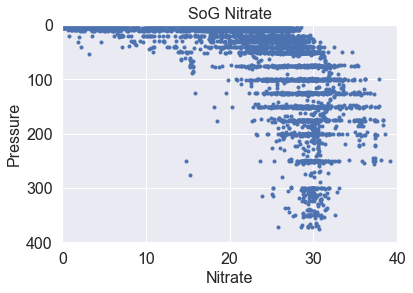

In [31]:

# Profile Plot
plt.plot(data_SoG.Nitrate,data_SoG.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.set_ylim(0,400)
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('SoG Nitrate');

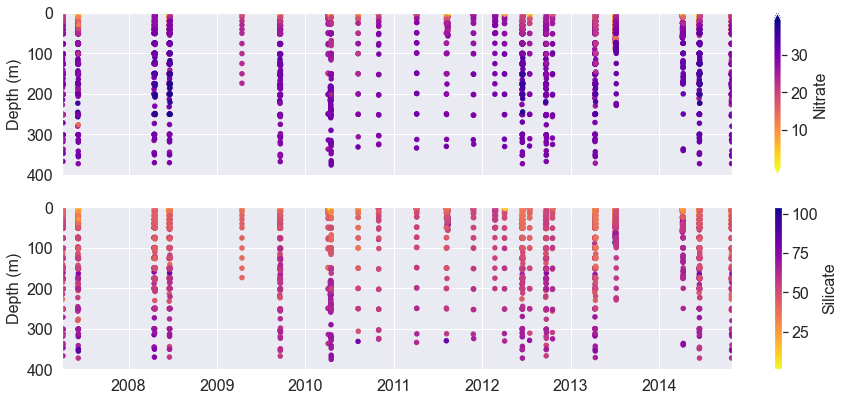

In [32]:
# Scatterplots of Temperature and Salinity
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,6))


sc1 = ax1.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Nitrate, cmap='plasma_r', s=20)
sc2 = ax2.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Silicate, cmap='plasma_r', s=20)

# Because the X and Y axes are shared, we only have to set limits once
ax1.set_ylim(0,400)
ax1.set_xlim(data_SoG.index[0],data_SoG.index[-1]) # Set the time limits to match the dataset
ax1.invert_yaxis() # Invert y axis

cbar = fig.colorbar(sc1, ax=ax1,orientation='vertical',extend='both')
cbar.ax.set_ylabel('Nitrate')
#cbar.ax.set_ylim(0,100)

cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar2.ax.set_ylabel('Silicate')
#cbar2.ax.set_ylim(0,100)


ax1.set_ylabel('Depth (m)')

ax2.set_ylabel('Depth (m)')


fig.suptitle('')
#fig.autofmt_xdate()
fig.subplots_adjust(top=0.95);

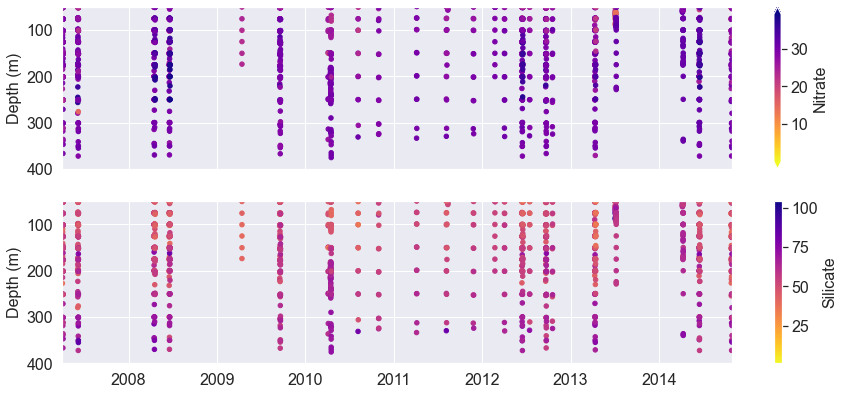

In [34]:
# Scatterplots of Temperature and Salinity
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,6))


sc1 = ax1.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Nitrate, cmap='plasma_r', s=20)
sc2 = ax2.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Silicate, cmap='plasma_r', s=20)

# Because the X and Y axes are shared, we only have to set limits once
ax1.set_ylim(50,400)
ax1.set_xlim(data_SoG.index[0],data_SoG.index[-1]) # Set the time limits to match the dataset
ax1.invert_yaxis() # Invert y axis

cbar = fig.colorbar(sc1, ax=ax1,orientation='vertical',extend='both')
cbar.ax.set_ylabel('Nitrate')
#cbar.ax.set_ylim(0,100)

cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical')
cbar2.ax.set_ylabel('Silicate')
#cbar2.ax.set_ylim(0,100)


ax1.set_ylabel('Depth (m)')

ax2.set_ylabel('Depth (m)')


fig.suptitle('')
#fig.autofmt_xdate()
fig.subplots_adjust(top=0.95);

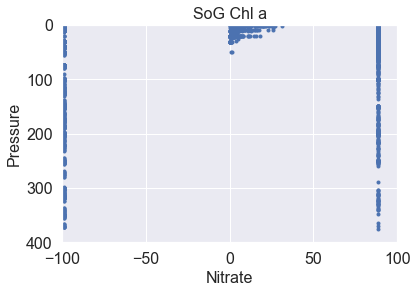

In [35]:

# Profile Plot
plt.plot(data_SoG.Chla,data_SoG.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.set_ylim(0,400)
ax.invert_yaxis()
ax.set_xlim(-100,100)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('SoG Chl a');

In [36]:
data_SoG = data_SoG.loc[(data_SoG['Chla'] >0)&(data_SoG['Chla'] < 88)]

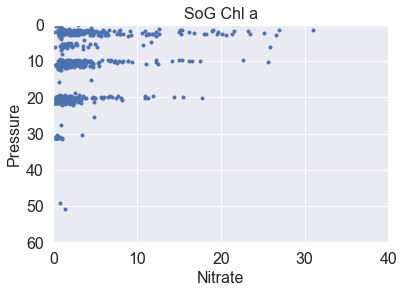

In [37]:
# Profile Plot
plt.plot(data_SoG.Chla,data_SoG.Pressure, linestyle='', marker='.');

# Flip the y-axis
ax = plt.gca()
ax.set_ylim(0,60)
ax.invert_yaxis()
ax.set_xlim(0,40)

# Label the Plot
plt.ylabel('Pressure')
plt.xlabel('Nitrate');
plt.title('SoG Chl a');

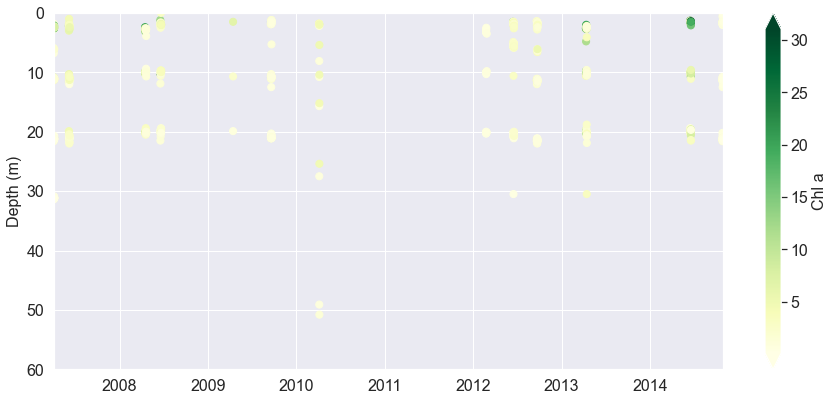

In [38]:
# Scatterplots of Temperature and Salinity
fig,ax = plt.subplots(figsize=(15,6))


sc3 = ax.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Chla, cmap='YlGn', s=50)

# Because the X and Y axes are shared, we only have to set limits once
ax.set_ylim(0,60)
ax.set_xlim(data_SoG.index[0],data_SoG.index[-1]) # Set the time limits to match the dataset
ax.invert_yaxis() # Invert y axis

cbar = fig.colorbar(sc3, ax=ax,orientation='vertical',extend='both')
cbar.ax.set_ylabel('Chl a')
#cbar.ax.set_ylim(0,100)


ax.set_ylabel('Depth (m)')

fig.suptitle('')
#fig.autofmt_xdate()
fig.subplots_adjust(top=0.95);

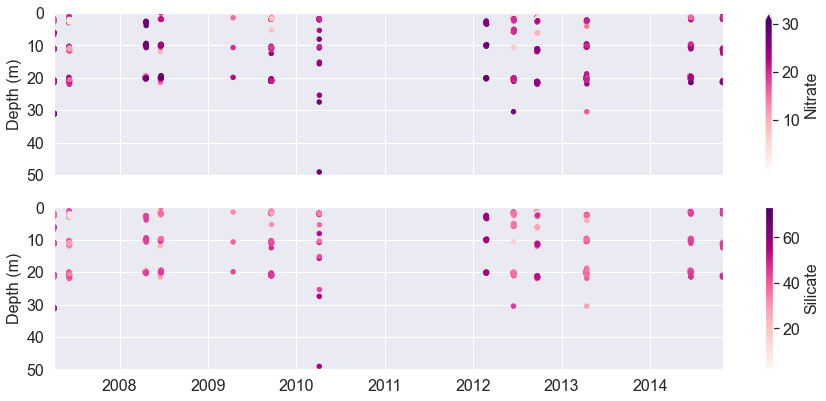

In [39]:
# Scatterplots of Temperature and Salinity
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,6))


sc3 = ax1.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Nitrate, cmap='RdPu', s=20)
sc4 = ax2.scatter(data_SoG.index, data_SoG.Pressure, c=data_SoG.Silicate, cmap='RdPu', s=20)

# Because the X and Y axes are shared, we only have to set limits once
ax1.set_ylim(0,50)
ax1.set_xlim(data_SoG.index[0],data_SoG.index[-1]) # Set the time limits to match the dataset
ax1.invert_yaxis() # Invert y axis

cbar = fig.colorbar(sc3, ax=ax1,orientation='vertical',extend='both')
cbar.ax.set_ylabel('Nitrate')
#cbar.ax.set_ylim(0,100)

cbar2 = fig.colorbar(sc4, ax=ax2, orientation='vertical')
cbar2.ax.set_ylabel('Silicate')
#cbar2.ax.set_ylim(0,100)


ax1.set_ylabel('Depth (m)')

ax2.set_ylabel('Depth (m)')


fig.suptitle('')
#fig.autofmt_xdate()
fig.subplots_adjust(top=0.95);